In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import data_array as data_array
import disfa as disfa
import numpy as np
from scipy import ndimage
import scipy

In [23]:
# use the first subject as example. all availabe subjects are stored in disfa.disfa_id_subj_all
id_sub = 1
# load all AU targets from subject 1
targets = disfa.disfa['AUall'][id_sub][:]

[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN001_labels_AUall.mat


In [24]:
# targets contain 4845 frames and 12 AUs
# see http://www.engr.du.edu/mmahoor/DISFAContent.htm for the description of the AUs, the order is ascending
targets.shape

(4845, 12)

In [25]:
#load all images from subject 1
images = disfa.disfa['images'][id_sub][:]
"""
# load all subjects
all_images = np.empty((0, 48, 48))
for s in [1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,21,23,24,25,26,27,28,29,30,31,32]:
    images = disfa.disfa['images'][s][:]
    resized_images = np.zeros((images.shape[0],48,48))
    for i in xrange(images.shape[0]):
        resized_images[i,:,:] = scipy.misc.imresize(images[i,:,:],[48,48])
    del images
    all_images = np.append(all_images,resized_images,axis=0)
    print all_images.shape
   """

[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN001_features_images.mat


"\n# load all subjects\nall_images = np.empty((0, 48, 48))\nfor s in [1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,21,23,24,25,26,27,28,29,30,31,32]:\n    images = disfa.disfa['images'][s][:]\n    resized_images = np.zeros((images.shape[0],48,48))\n    for i in xrange(images.shape[0]):\n        resized_images[i,:,:] = scipy.misc.imresize(images[i,:,:],[48,48])\n    del images\n    all_images = np.append(all_images,resized_images,axis=0)\n    print all_images.shape\n   "

In [26]:
# images contain 4845 frames with images of size 128 x 118 (x and y axis are swapped)
images.shape

(4845, 118, 128)

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


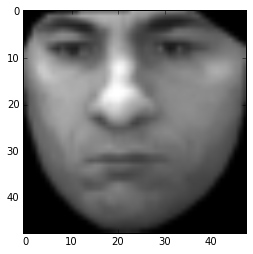

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


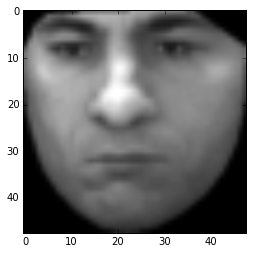

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


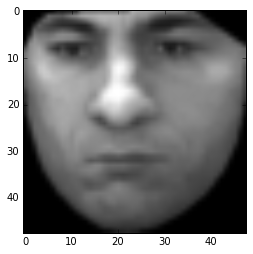

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


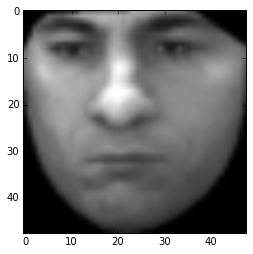

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


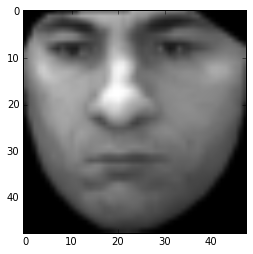

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


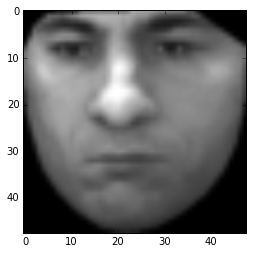

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


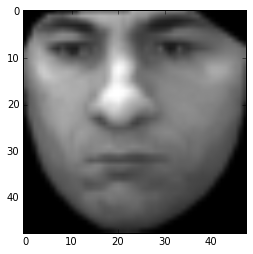

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


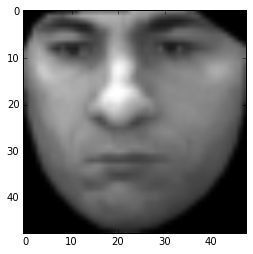

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


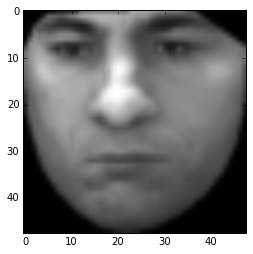

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


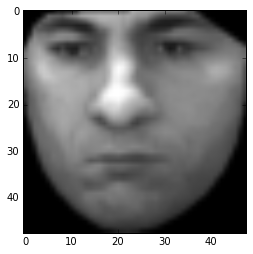

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


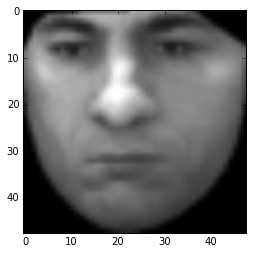

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


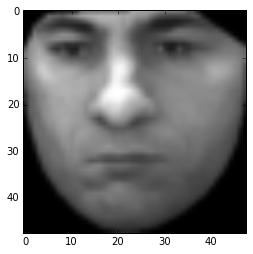

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


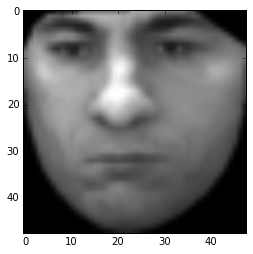

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


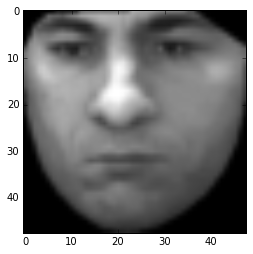

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


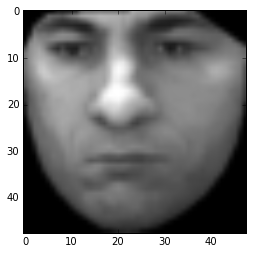

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


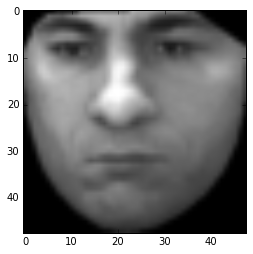

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


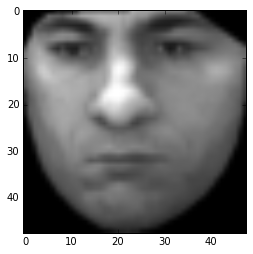

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


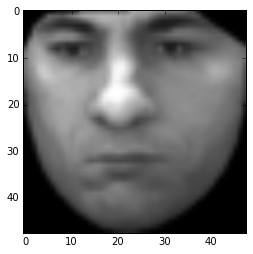

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


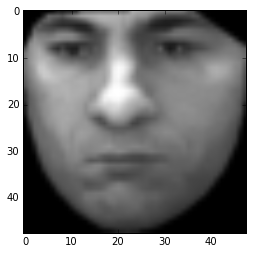

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


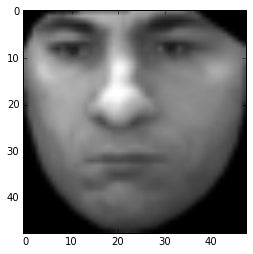

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


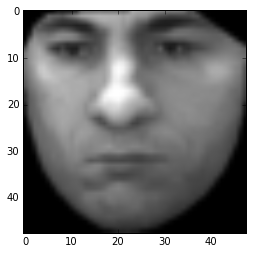

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


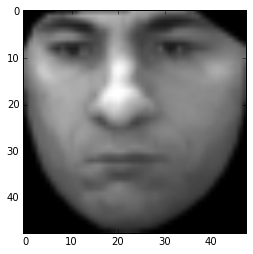

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


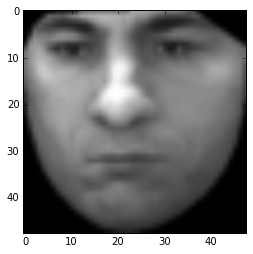

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


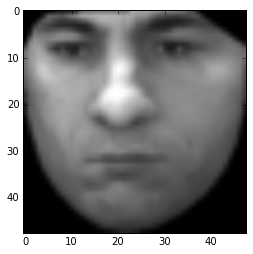

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


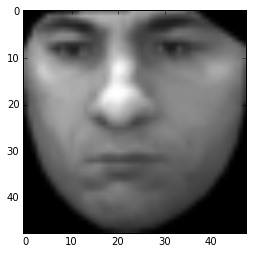

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


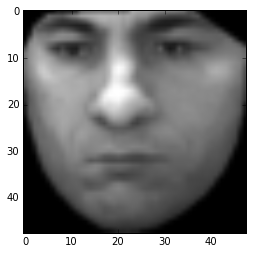

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


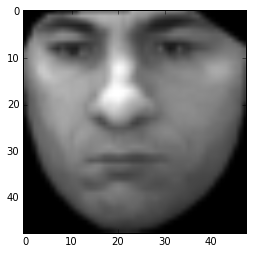

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


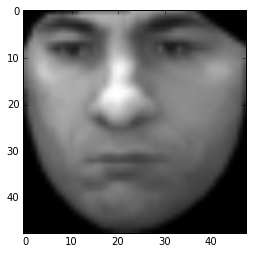

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


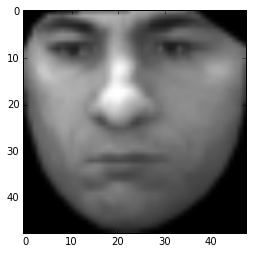

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


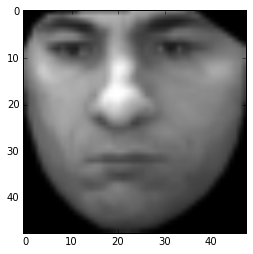

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


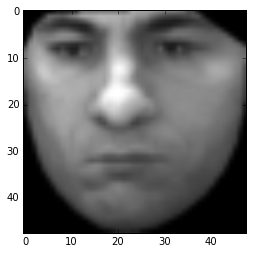

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


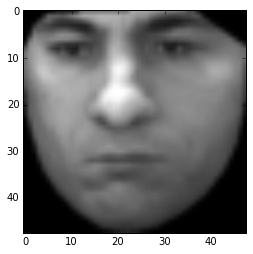

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


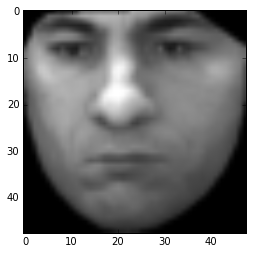

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


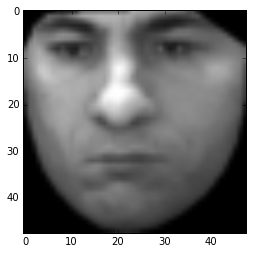

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


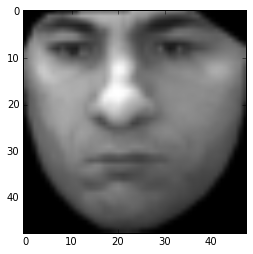

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


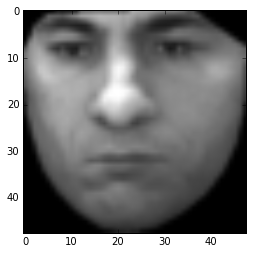

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


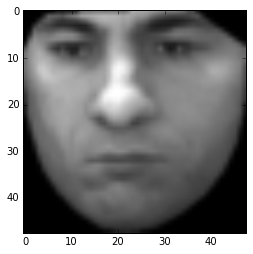

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


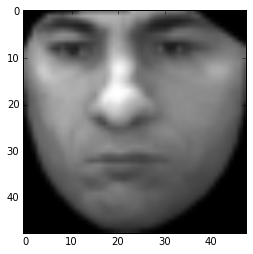

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


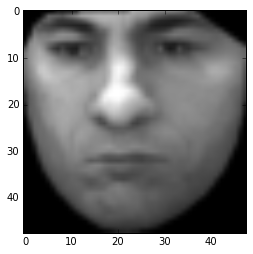

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


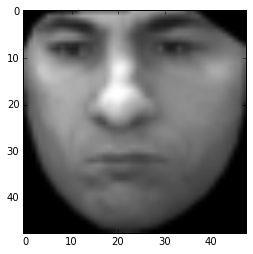

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


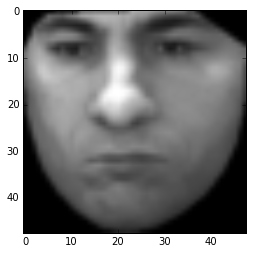

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


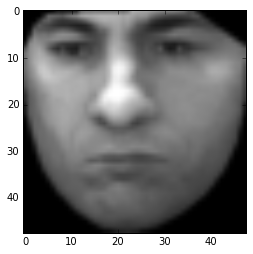

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


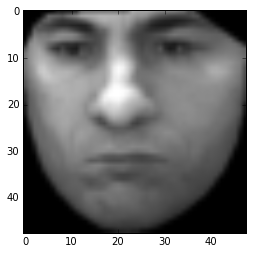

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


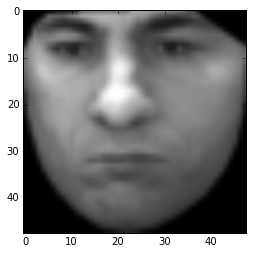

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


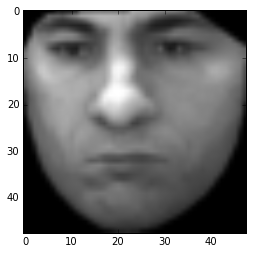

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


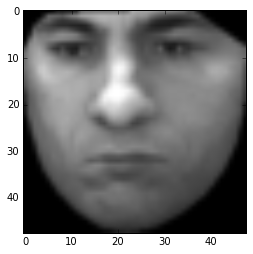

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


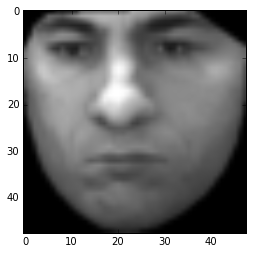

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


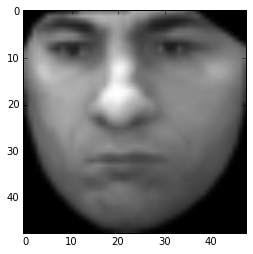

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


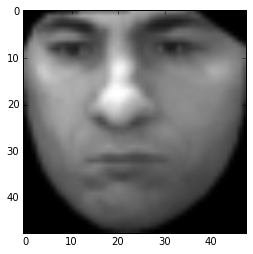

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


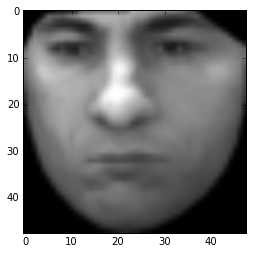

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


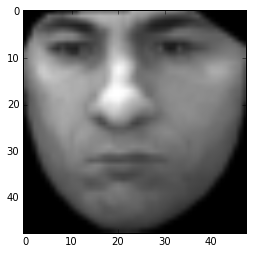

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


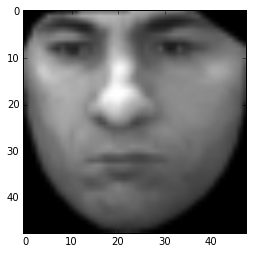

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


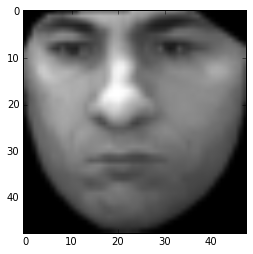

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


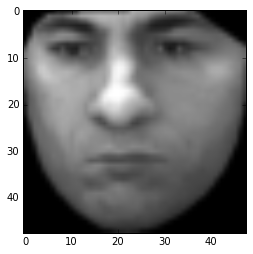

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


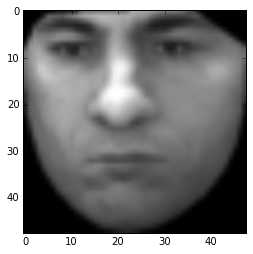

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


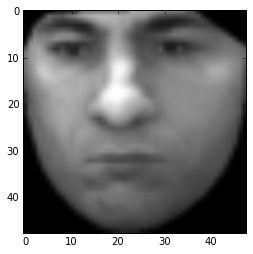

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


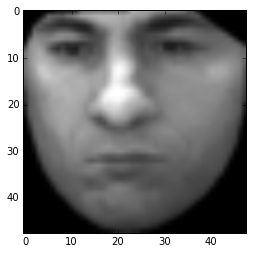

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


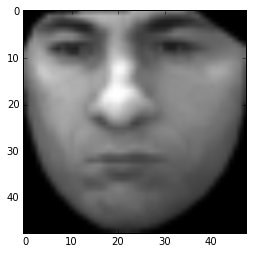

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


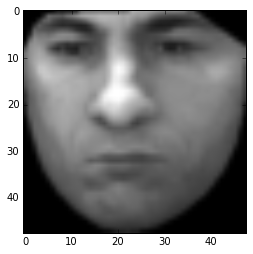

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


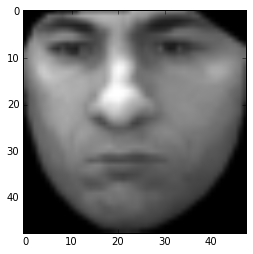

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


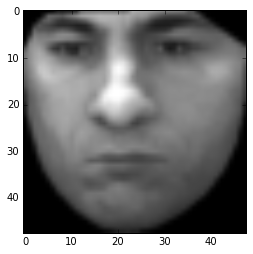

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


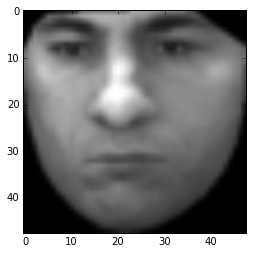

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


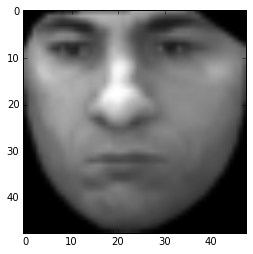

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


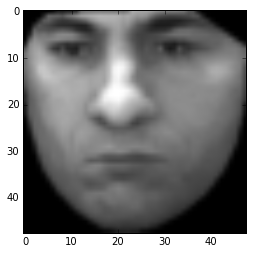

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


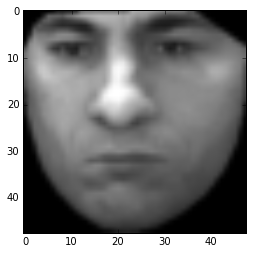

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


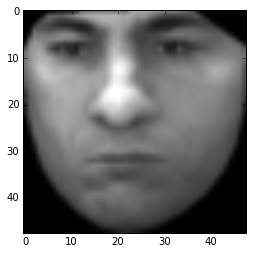

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


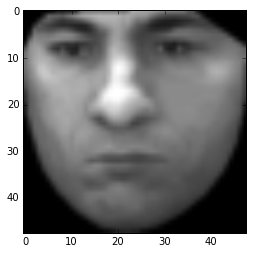

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


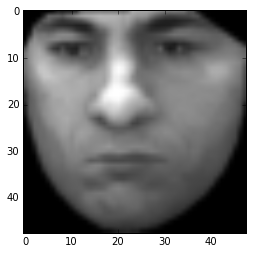

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


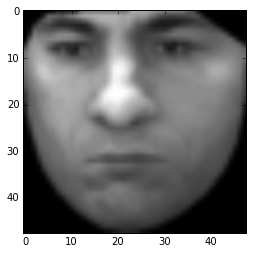

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


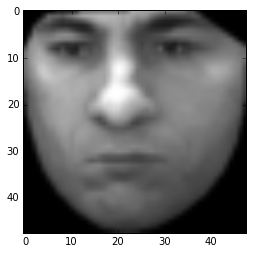

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


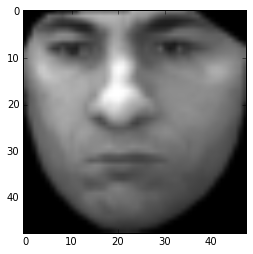

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


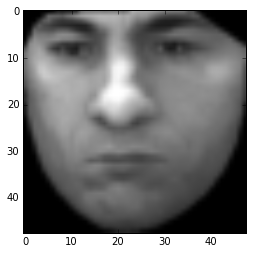

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


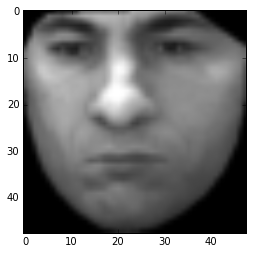

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


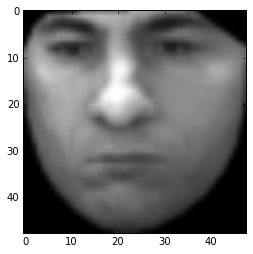

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


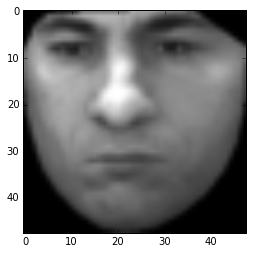

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


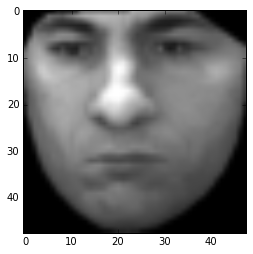

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


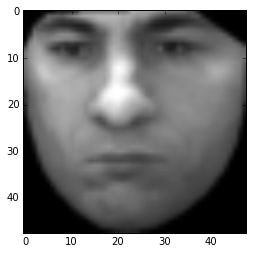

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


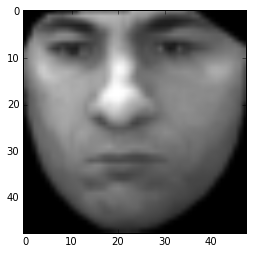

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


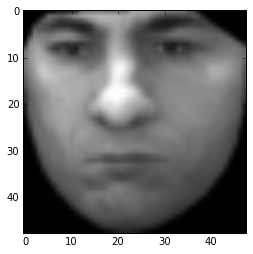

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


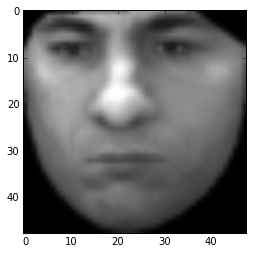

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


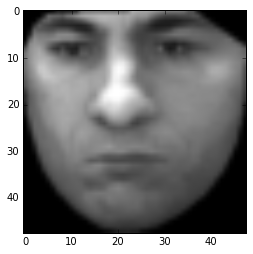

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


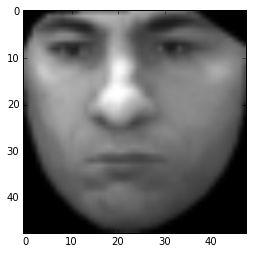

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


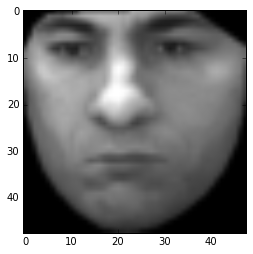

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


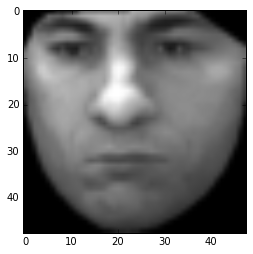

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


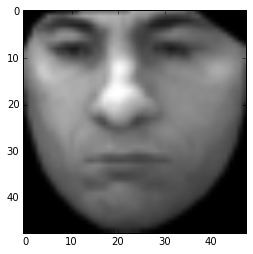

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


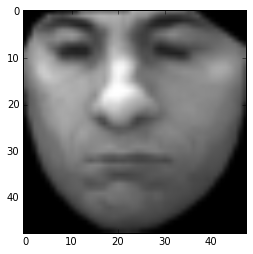

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


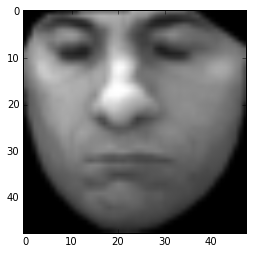

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


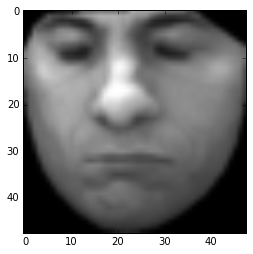

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


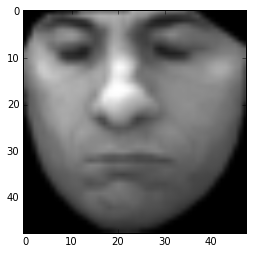

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]


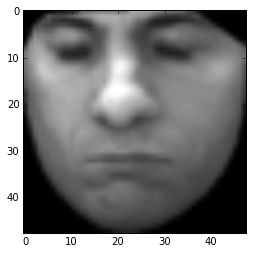

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  2.  2.  0.  0.  0.]


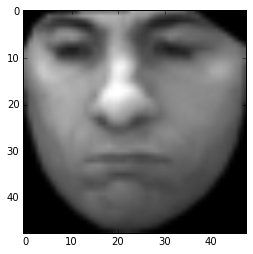

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  2.  2.  0.  0.  0.]


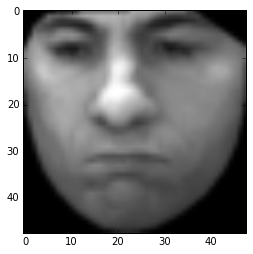

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]


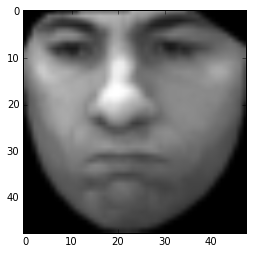

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]


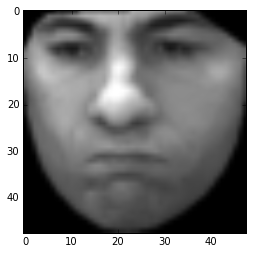

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]


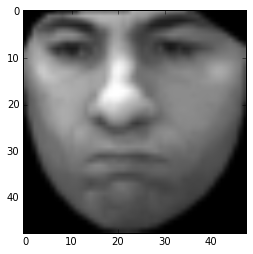

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]


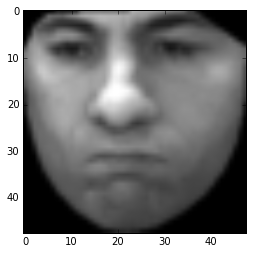

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]


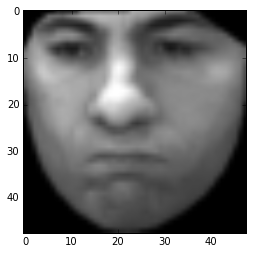

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]


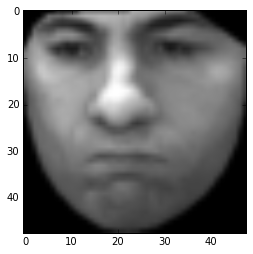

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]


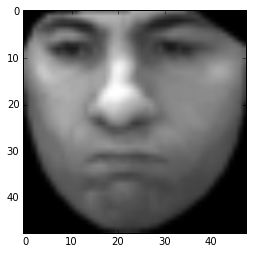

annotated AUs are [ 0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.]


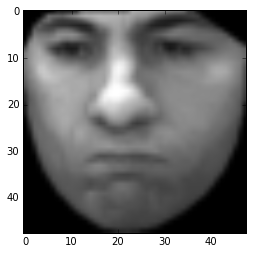

In [35]:
for j in xrange(100):
    i = j + 3000
    plt.figure()
    image = scipy.misc.imresize(images[i,:,:],[48,48])
    # print the AU annotations and plot the image of the first sample
    print('annotated AUs are {}'.format(targets[i,:]))
    plt.imshow(image, cmap='gray')
    plt.show()

In [6]:
# as convenience function to load data from all subjects, use:
targets_all, id_array = data_array.IndicesCollection(disfa.disfa_ic_all).getitem(disfa.disfa['AUall'])

 [FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN001_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN002_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN003_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN004_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN005_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN006_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN007_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN008_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN009_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN010_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN011_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN012_labels_A

In [ ]:
# id_array contains the subjects and frame number of each sample:
id_array[0,:]
#this means the first sample is from subject 1 frame 0

In [7]:
a = 5000
print 'subject', id_array[a,0], 'frame', id_array[a,1]
print targets_all[a]
print targets_all.shape

subject 2 frame 155
[ 0.  0.  0.  0.  1.  0.  3.  0.  0.  0.  3.  2.]
(130814, 12)


In [33]:
import sPickle
import gzip
sPickle.s_dump(all_images, gzip.open( "disfa_images.p", "wb" ) )
sPickle.s_dump((targets_all,id_array), gzip.open( "disfa_labels.p", "wb" ) )

KeyboardInterrupt: 

In [ ]:
print 'done!'

In [ ]:
import pickle
import gzip

#store the object
myObject = {'a':'blah','b':range(10)}
f = gzip.open('testPickleFile.pklz','wb')
pickle.dump(myObject,f)
f.close()

#restore the object
f = gzip.open('testPickleFile.pklz','rb')
myNewObject = pickle.load(f)
f.close()

print myObject
print myNewObject